In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Cardetails.csv')

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
df.drop(columns=['torque'],inplace=True)

In [6]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(7907, 12)

In [9]:
df.duplicated().sum()

1189

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(6718, 12)

In [12]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [13]:
for i in df.columns:
    print('unique values of ' +i)
    print(df[i].unique())
    print("*****************\n")

unique values of name
['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']
*****************

unique values of year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
*****************

unique values of selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  1025000
   235000  1700000  1200000

In [14]:
def clean(column):
    column=column.split(' ')[0]
    return column.strip(' ')

In [15]:
def remove(value):
    value=value.split(' ')[0]
    value=value.strip()
    if value == '':
        value=0
    return float(value)    

In [16]:
df['name']=df['name'].apply(clean)
df['mileage']=df['mileage'].apply(remove)
df['max_power']=df['max_power'].apply(remove)
df['engine']=df['engine'].apply(remove)

In [17]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [18]:
for i in df.columns:
    print('unique values of ' +i)
    print(df[i].unique())
    print("*****************\n")

unique values of name
['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi' 'Audi'
 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo' 'Daewoo'
 'Kia' 'Fiat' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel']
*****************

unique values of year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
*****************

unique values of selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   63

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   object 
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   object 
 5   seller_type    6718 non-null   object 
 6   transmission   6718 non-null   object 
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   float64
 9   engine         6718 non-null   float64
 10  max_power      6718 non-null   float64
 11  seats          6718 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 682.3+ KB


C:\Users\ashis\AppData\Local\Temp\ipykernel_9096\1626769771.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['selling_price'])
C:\Users\ashis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='selling_price', ylabel='Density'>

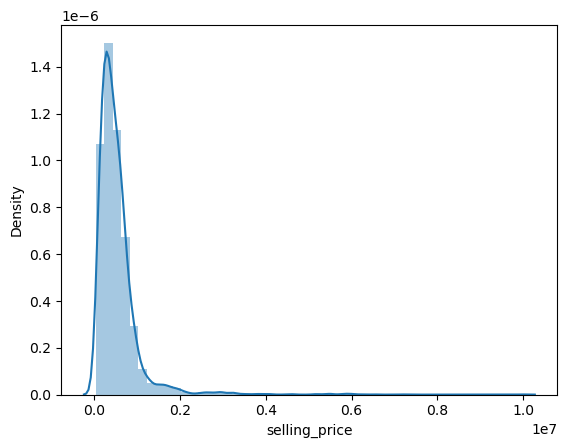

In [20]:
sns.distplot(df['selling_price'])

In [21]:
df['selling_price'].skew()

5.570562222083839

C:\Users\ashis\AppData\Local\Temp\ipykernel_9096\3960663980.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['selling_price']))
C:\Users\ashis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='selling_price', ylabel='Density'>

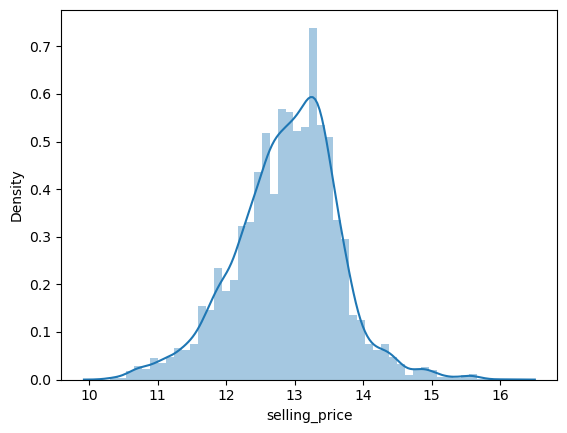

In [22]:
sns.distplot(np.log(df['selling_price']))

In [23]:
np.log(df['selling_price']).skew()

-0.1436628603833627

<Axes: xlabel='name'>

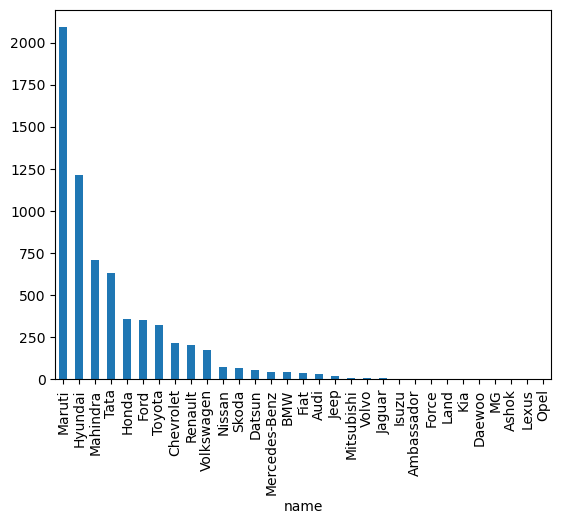

In [24]:
df['name'].value_counts().plot(kind='bar')

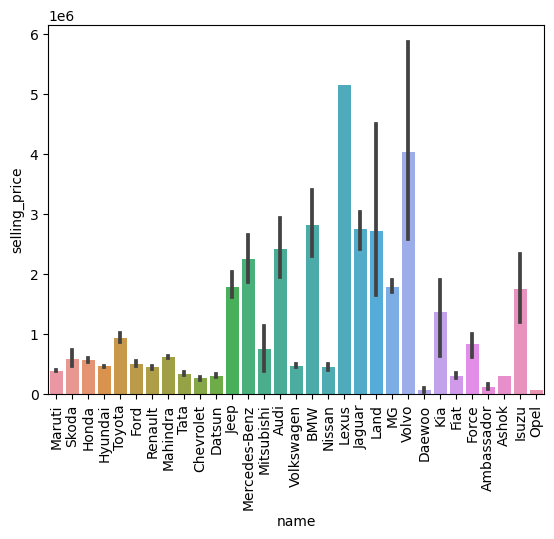

In [25]:
sns.barplot(x=df['name'],y=df['selling_price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='year'>

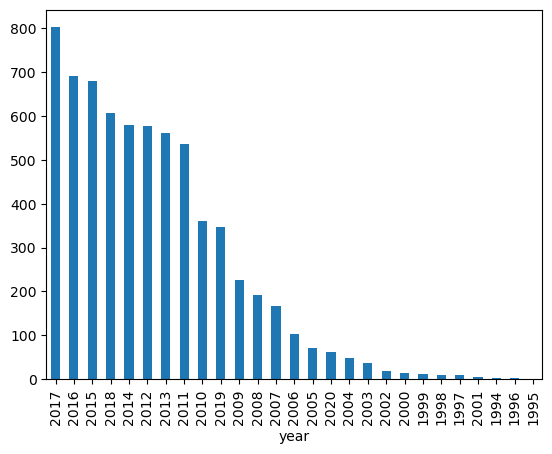

In [26]:
df['year'].value_counts().plot(kind='bar')

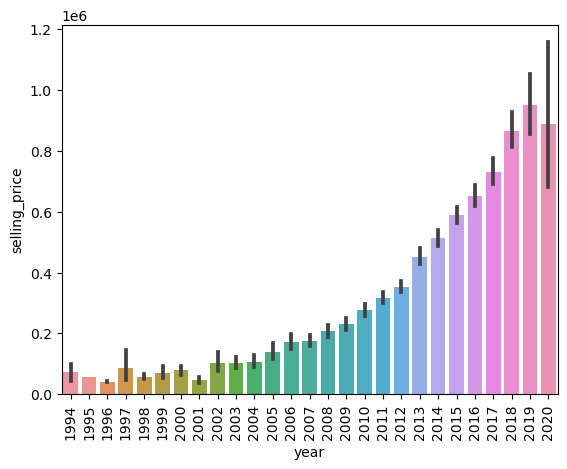

In [27]:
sns.barplot(x=df['year'],y=df['selling_price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='km_driven', ylabel='selling_price'>

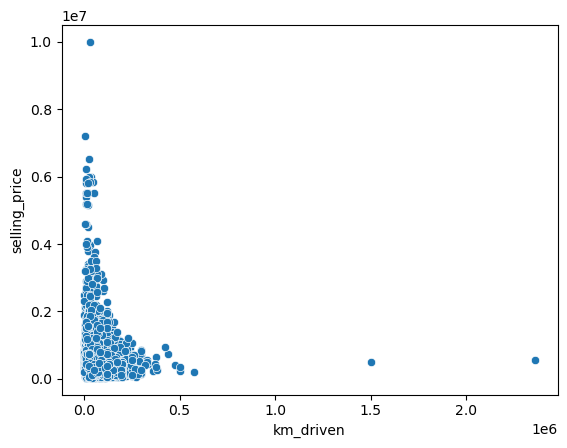

In [28]:
sns.scatterplot(x=df['km_driven'],y=df['selling_price'])

<Axes: xlabel='seller_type'>

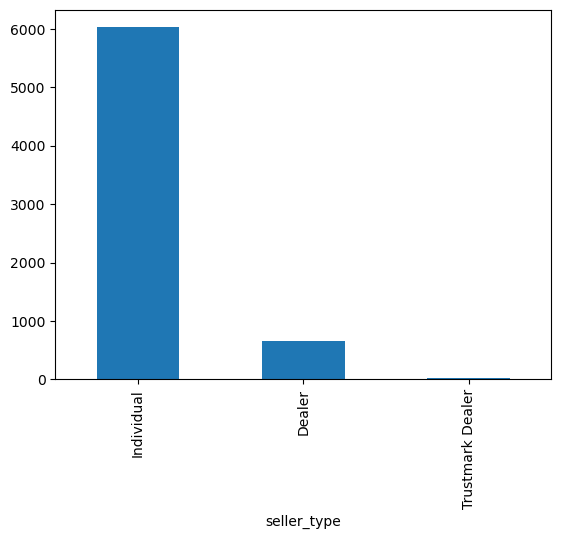

In [29]:
df['seller_type'].value_counts().plot(kind='bar')

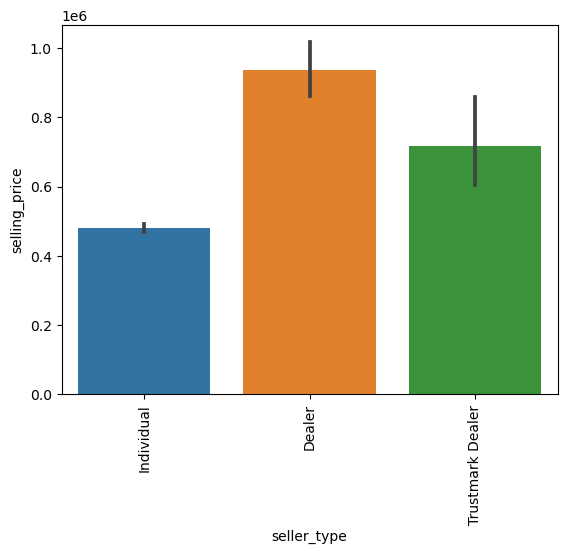

In [30]:
sns.barplot(x=df['seller_type'],y=df['selling_price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='transmission'>

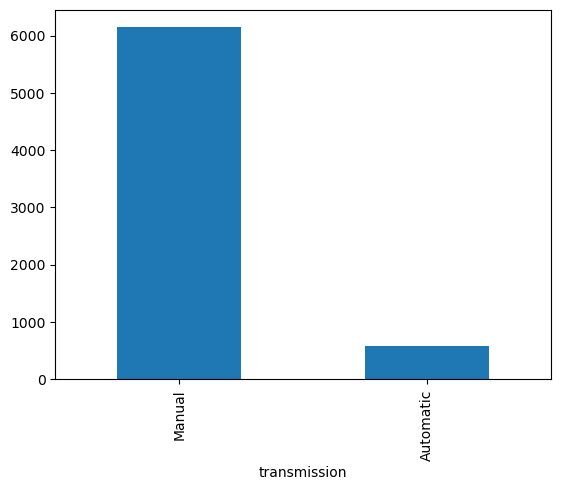

In [31]:
df['transmission'].value_counts().plot(kind='bar')

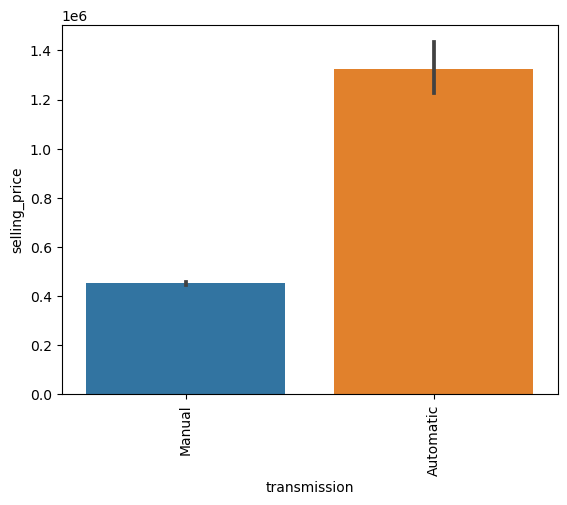

In [32]:
sns.barplot(x=df['transmission'],y=df['selling_price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='owner'>

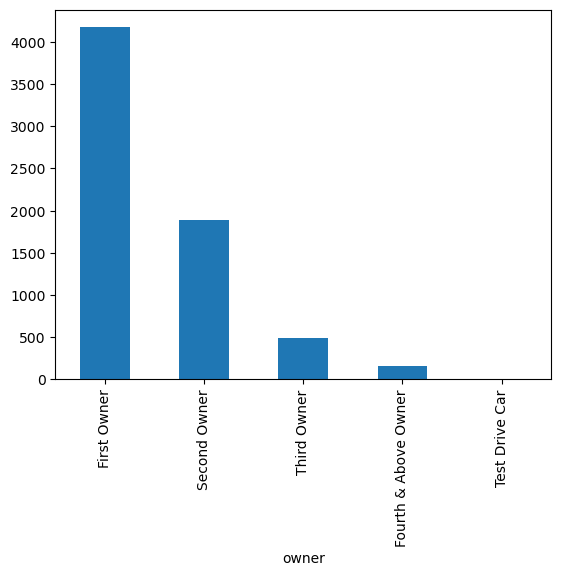

In [33]:
df['owner'].value_counts().plot(kind='bar')

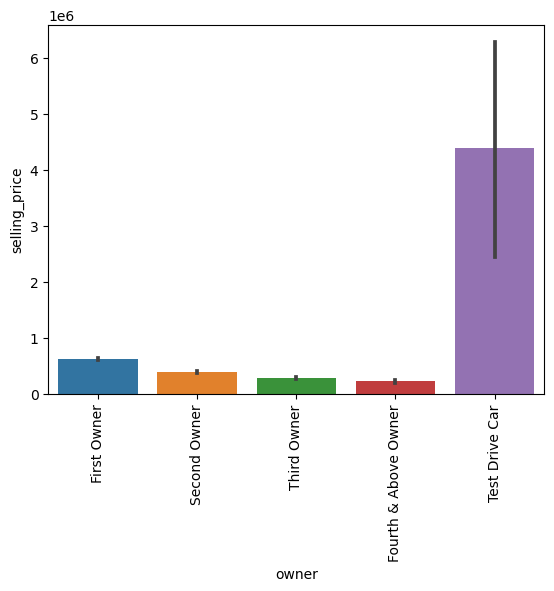

In [34]:
sns.barplot(x=df['owner'],y=df['selling_price'])
plt.xticks(rotation='vertical')
plt.show()

In [35]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


<Axes: xlabel='mileage', ylabel='selling_price'>

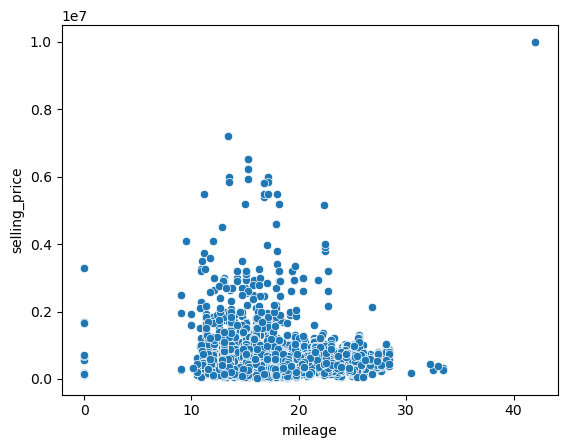

In [36]:
sns.scatterplot(x=df['mileage'],y=df['selling_price'])

<Axes: xlabel='engine', ylabel='selling_price'>

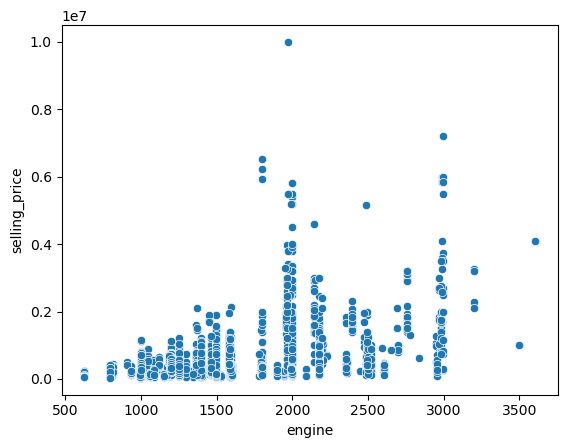

In [37]:
sns.scatterplot(x=df['engine'],y=df['selling_price'])

<Axes: xlabel='max_power', ylabel='selling_price'>

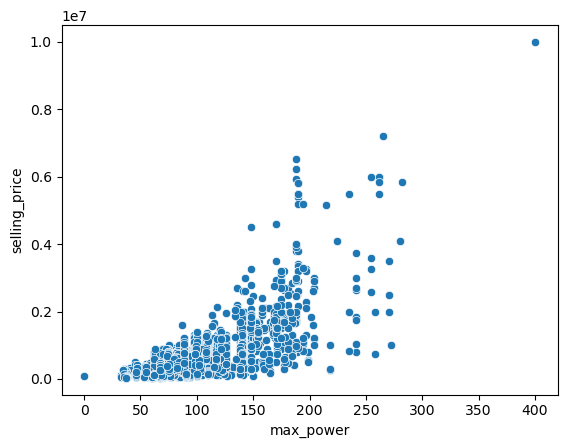

In [38]:
sns.scatterplot(x=df['max_power'],y=df['selling_price'])

<Axes: xlabel='seats', ylabel='selling_price'>

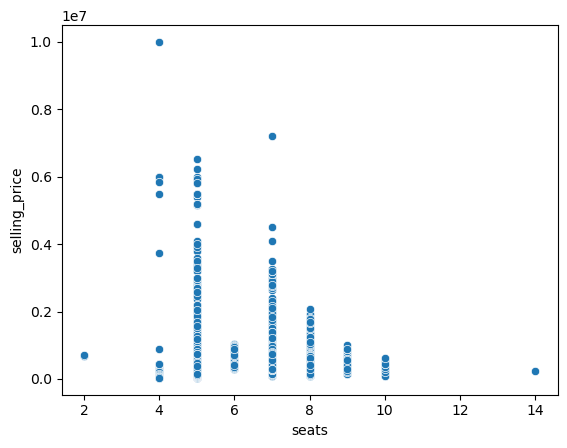

In [39]:
sns.scatterplot(x=df['seats'],y=df['selling_price'])

<Axes: >

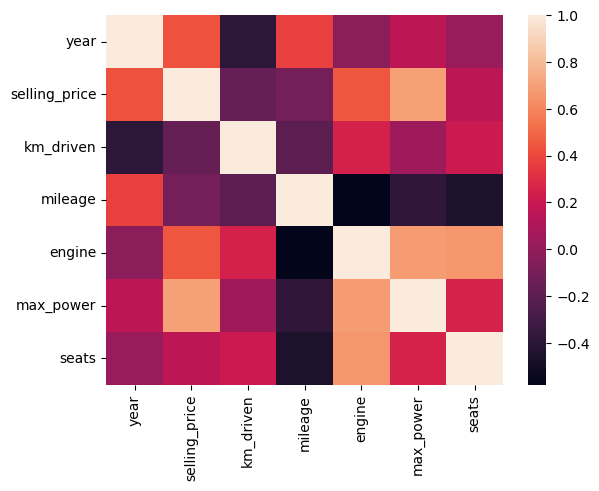

In [40]:
sns.heatmap(df.corr(numeric_only=True))

In [41]:
df['name'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [42]:
df['name'].replace(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31],inplace=True)

In [43]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [44]:
df['transmission'].replace(['Manual', 'Automatic'],[1,2],inplace=True)

In [45]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [46]:
df['seller_type'].replace(['Individual', 'Dealer', 'Trustmark Dealer'],[1,2,3],inplace=True)

In [47]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [48]:
df['fuel'].replace(['Diesel', 'Petrol', 'LPG', 'CNG'],[1,2,3,4],inplace=True)

In [49]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [50]:
df['owner'].replace(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'],[1,2,3,4,5],inplace=True)

In [51]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0
1,2,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,3,2006,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0
3,4,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0
4,1,2007,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,1,2013,260000,50000,2,1,1,2,18.90,998.0,67.10,5.0
8122,4,2014,475000,80000,1,1,1,2,22.54,1396.0,88.73,5.0
8123,4,2013,320000,110000,2,1,1,1,18.50,1197.0,82.85,5.0
8124,4,2007,135000,119000,1,1,1,4,16.80,1493.0,110.00,5.0


In [52]:
df.reset_index(inplace=True)

In [53]:
df.drop(columns=['index'],inplace=True)

In [54]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0
1,2,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,3,2006,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0
3,4,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0
4,1,2007,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6713,1,2013,260000,50000,2,1,1,2,18.90,998.0,67.10,5.0
6714,4,2014,475000,80000,1,1,1,2,22.54,1396.0,88.73,5.0
6715,4,2013,320000,110000,2,1,1,1,18.50,1197.0,82.85,5.0
6716,4,2007,135000,119000,1,1,1,4,16.80,1493.0,110.00,5.0


In [55]:
x=df.drop(columns=['selling_price'])
y=np.log(df['selling_price'])

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [58]:
model=LinearRegression()

In [59]:
model.fit(x,y)

LinearRegression()

In [60]:
predict=model.predict(x_test)

In [61]:
np.exp(predict)

array([581260.31086355, 321182.34393172, 658413.87138679, ...,
       329900.3606764 , 210464.81351912, 337625.30402566])

In [69]:
r2_score(y_test,predict)

0.8584533436749977